In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('/Users/chaozhang/Documents/ChaoLearning/AI Product Management/Machine Learning Foundations for Product Managers/CCPP_modeling/CCPP_data.csv')
df = pd.read_csv('CCPP_data.csv')

## - Temperature (T) in the range 1.81°C to 37.11°C,
## - Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
## - Relative Humidity (RH) in the range 25.56% to 100.16%
## - Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
## - Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

In [ ]:
df.rename(columns={"AT": "Ambient Temperature",
                   "AP": "Ambient Pressure",
                   "RH": "Relative Humidity",
                   "V": "Exhaust Vacuum",
                   "PE": "Power Output"
                   },
          inplace= True)

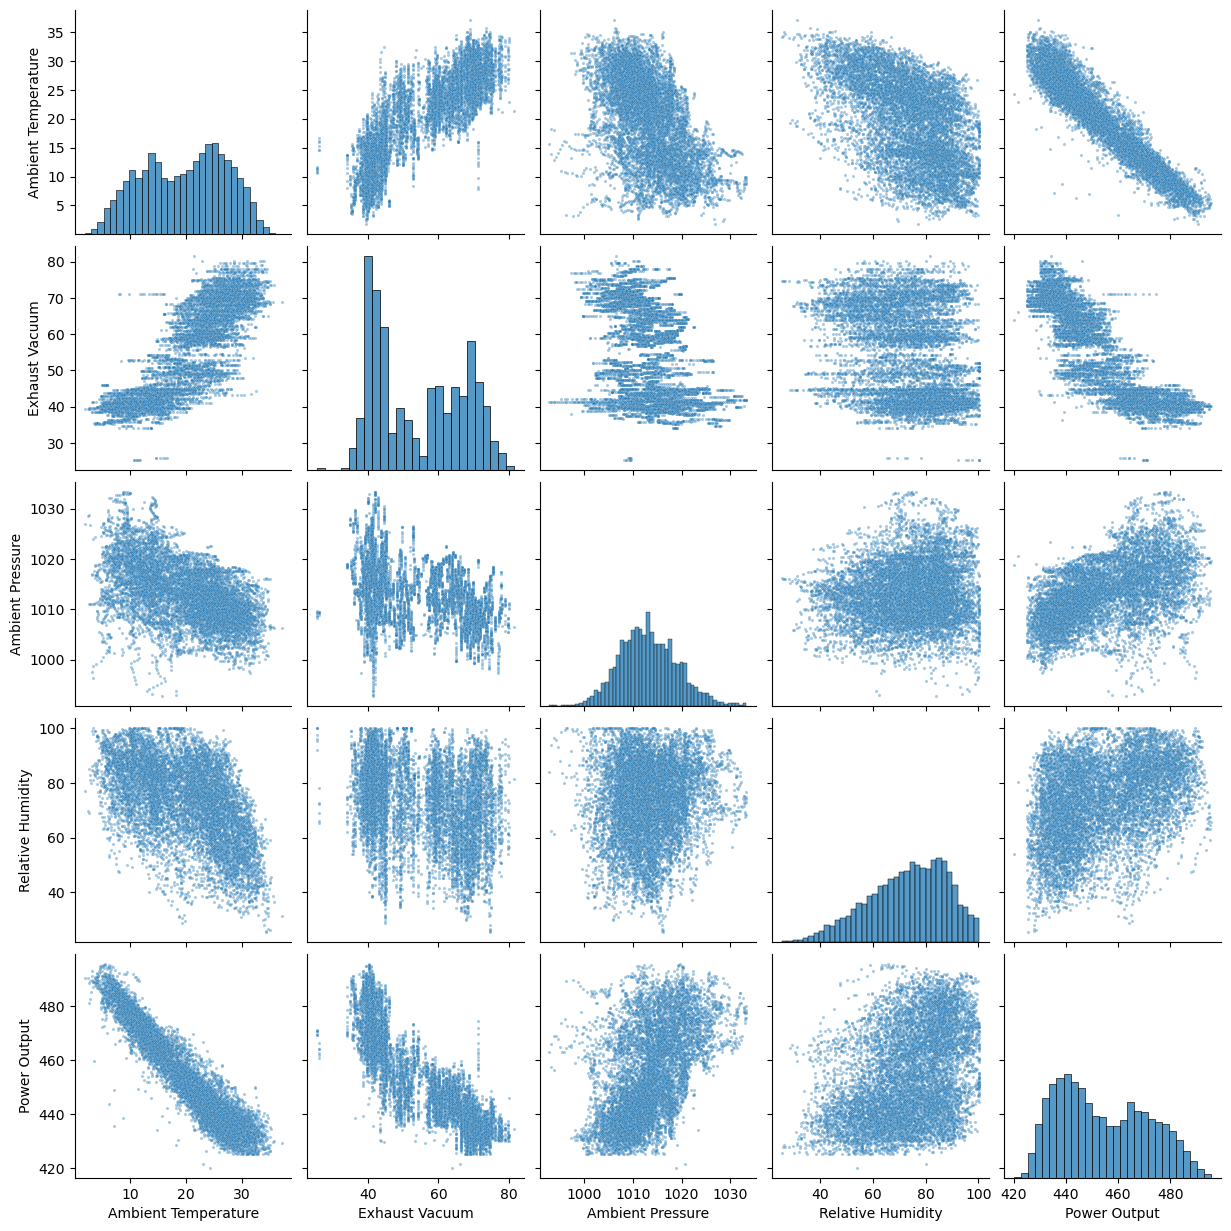

In [8]:
sns.pairplot(df,plot_kws={"s": 5,'alpha': 0.4})

In [14]:
from sklearn.model_selection import train_test_split
X = df[['Ambient Temperature','Exhaust Vacuum','Ambient Pressure','Relative Humidity']]
y = df['Power Output']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Linear Regression

In [15]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X,y)

LinearRegression()

In [16]:
lin_model.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [17]:
y_predict = pd.DataFrame(
    data = lin_model.predict(X),
    columns = ['Power Output predicted']
    )


RMSE training dataset  20.76739753253501


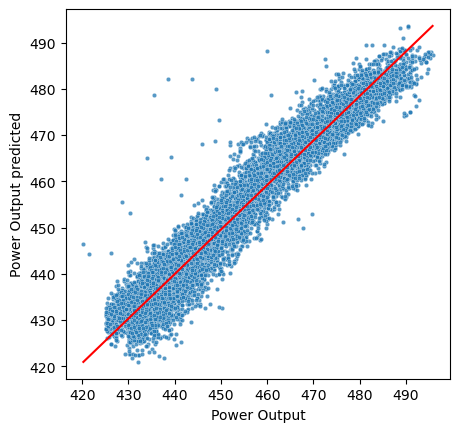

In [18]:
sns.scatterplot(
    x = y,
    y = y_predict['Power Output predicted'],
    s = 10,
    alpha = 0.75
)
plt.gca().set_aspect('equal', adjustable='box')
sns.lineplot(
    x=np.linspace(y.min(),y.max(), 100),
    y=np.linspace(y_predict['Power Output predicted'].min(), y_predict['Power Output predicted'].max(), 100),
    color='red', 
    #label='y = x'
    )

print('RMSE training dataset ',np.mean((y- y_predict['Power Output predicted'])**2))

In [19]:
lin_model.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 4, random_state=10).fit(X,y)

In [21]:
y_predict = pd.DataFrame(
    data = rf_model.predict(X),
    columns = ['Power Output predicted']
    )


RMSE training dataset  3.0316576936141306


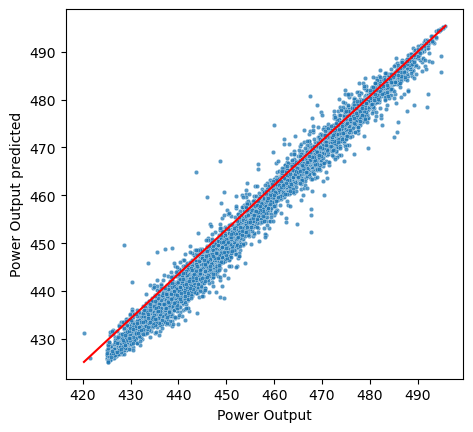

In [22]:
sns.scatterplot(
    x = y,
    y = y_predict['Power Output predicted'],
    s = 10,
    alpha = 0.75
)
plt.gca().set_aspect('equal', adjustable='box')
sns.lineplot(
    x=np.linspace(y.min(),y.max(), 100),
    y=np.linspace(y_predict['Power Output predicted'].min(), y_predict['Power Output predicted'].max(), 100),
    color='red', 
    #label='y = x'
    )

print('RMSE training dataset ',np.mean((y- y_predict['Power Output predicted'])**2))